In [1]:
import pandas as pd
import numpy as np
import talib as ta
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from scipy.signal import argrelextrema
import json
from bs4 import BeautifulSoup
import requests 
import urllib.request
import datetime
from datetime import timedelta, datetime
import time
diretorio= os.getcwd()
diretorio

'/Users/igoracmorais/igor/Wise&Trust/CPM_trading2/Trading/Rotines/Python'

In [75]:
data=pd.read_csv(diretorio+"/btc.csv",sep=";",index_col="datetime")

In [76]:
def mfi(data,overbought=90,oversold=20,time=[]):
    for mfii in time:
        data["mfi_"+str(mfii)]=ta.MFI(data.high,data.low,data.close,data.volume,timeperiod=mfii)
        data["mfi_s"+str(mfii)]=0
        data.loc[(data["mfi_"+str(mfii)] >= overbought),"mfi_s"+str(mfii)]=-1
        data.loc[(data["mfi_"+str(mfii)] <= oversold),"mfi_s"+str(mfii)]=1
    return data

In [105]:
# Candlestick graph
import warnings
warnings.filterwarnings("ignore")
def candle_mfi(data,n=200,nome_coluna_datas="datetime",coluna_sinal="mfi_14"):
    ohlc=data.reset_index()[-n:]
    ohlc[nome_coluna_datas]=pd.to_datetime(ohlc[nome_coluna_datas])
    ohlc[nome_coluna_datas]=ohlc[nome_coluna_datas].apply(mdates.date2num)
    #
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(7,8)) 
    ax1 = plt.subplot2grid((7,1), (0, 0),rowspan=3)
    ax2 = plt.subplot2grid((7,1), (3, 0),rowspan=2)
    ax3 = plt.subplot2grid((7,1), (5, 0),rowspan=2)
    ax1.axes.get_xaxis().set_visible(False)
    ax2.axes.get_xaxis().set_visible(False)
    ax1.yaxis.set_tick_params(labelsize=12)
    ax2.set_ylabel('volume', fontsize=14)
    ax2.yaxis.set_tick_params(labelsize=12)
    ax3.set_ylabel(coluna_sinal, fontsize=14)
    ax3.yaxis.set_tick_params(labelsize=12)
    #
    candlestick_ohlc(ax1, ohlc.values, width=.6, colorup='green', colordown='red')
    # volume graph
    ohlc.loc[:,"volup"]=np.nan
    ohlc.loc[:,"voldown"]=np.nan
    ohlc.loc[:,"r"]=ohlc.close.pct_change(1)
    ohlc.loc[ohlc['r'] > 0,"volup"]=ohlc.volume
    ohlc.loc[ohlc['r'] <0,"voldown"]=ohlc.volume
    ax2.bar(ohlc[nome_coluna_datas], ohlc['volup'], color = 'green', lw=1)
    ax2.bar(ohlc[nome_coluna_datas], ohlc['voldown'], color = 'red', lw=1)
    plt.yticks(fontsize=8)
    # mfi
    ax3.plot(ohlc[nome_coluna_datas],ohlc[coluna_sinal],lw=1,color='black')
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    import matplotlib.ticker as ticker
    ax3.xaxis.set_major_locator(ticker.MaxNLocator(10))
    plt.xticks(fontsize=8)
    return plt.show()

## Exemplo

In [95]:
df=mfi(data,time=[7,14,21])
df.tail(3)

,open,high,low,close,volume,mfi_7,mfi_s7,mfi_14,mfi_s14,mfi_21,mfi_s21,volup,voldown,r
datetime,,,,,,,,,,,,,,
2018-10-14,6267.27,6346.56,6247.17,6277.73,2.154229e+08,31.169929,0,31.393337,0,40.837938,0,2.154229e+08,NaN,0.001669
2018-10-15,6277.73,7234.83,6244.77,6612.36,1.190524e+09,51.775236,0,50.559924,0,53.055966,0,1.190524e+09,NaN,0.053304
2018-10-16,6612.69,6612.99,6583.30,6606.12,8.020117e+06,55.633064,0,53.452511,0,56.326038,0,NaN,8020116.71,-0.000944


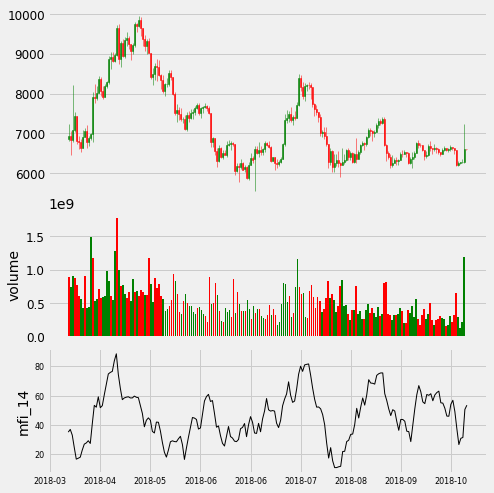

In [106]:
candle_mfi(df)